In [36]:
import typing as t 
from glob import glob

import pandas as pd
import numpy as np
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord

%matplotlib inline

In [14]:
gh_path = '/home/is6/glyco/annotations.tsv'

gh_matches = {
    # `sample` is either 'chz' or 'sp'
    sample: grp for sample, grp in pd.read_csv(gh_path, sep='\t').groupby('sample')
}
gh_matches.keys()

dict_keys(['chz', 'sp'])

In [29]:
annotation_root = '/home/is6/annotation'

annotations = {
    sample: list(SeqIO.parse(glob(f'{annotation_root}/{sample}/*.gbk')[0], 'gb')) 
    for sample in gh_matches
}

gh_loci = {
    sample: set(grp['query']) for sample, grp in gh_matches.items()
}

In [34]:
def extract_cds_loci(contig: SeqRecord) -> t.Set[str]:
    features = contig.features
    # extract cds locus tags
    loci = (feat.qualifiers['locus_tag'][0] 
            for feat in features if feat.type == 'CDS')
    return set(loci)


# calculate contig length for each contig if its set of loci intersects with known gh loci
contig_features = {
    sample: pd.DataFrame.from_records([
        {'label': contig.id,
         'length': len(contig)}
        for contig in contigs
        if bool(extract_cds_loci(contig) & gh_loci[sample])
    ])
    for sample, contigs in annotations.items()
}


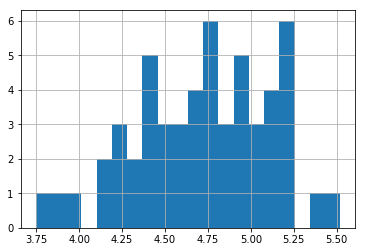

In [41]:
contig_features['chz']['length'].apply(lambda x: np.log(x) / np.log(10)).hist(bins=20)

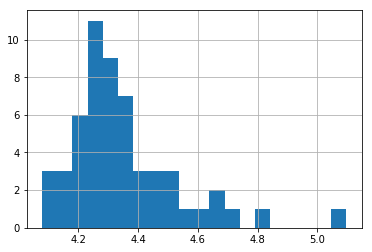

In [42]:
contig_features['sp']['length'].apply(lambda x: np.log(x) / np.log(10)).hist(bins=20)